In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Polygon, Point
import numpy as np

from pathlib import Path

from asim.dataset.maps.gpkg.gpkg_map import GPKGMap

from asim.common.visualization.maps.plot_maps import _plot_map_on_ax
from asim.common.geometry.base import Point2D
from asim.dataset.maps.map_datatypes import MapSurfaceType



name = "us-pa-pittsburgh-hazelwood"
map_file_path = Path(f"/home/daniel/asim_workspace/asim/notebooks/{name}.gpkg")

map_api = GPKGMap(map_file_path)
map_api.initialize()

/home/daniel/asim_workspace/asim/asim/dataset/maps/gpkg/gpkg_map.py:70: UserWarning: GPKGMap: lane_group not available in /home/daniel/asim_workspace/asim/notebooks/us-pa-pittsburgh-hazelwood.gpkg
  warnings.warn(f"GPKGMap: {map_layer_name} not available in {str(self._file_path)}")
/home/daniel/asim_workspace/asim/asim/dataset/maps/gpkg/gpkg_map.py:70: UserWarning: GPKGMap: intersection not available in /home/daniel/asim_workspace/asim/notebooks/us-pa-pittsburgh-hazelwood.gpkg
  warnings.warn(f"GPKGMap: {map_layer_name} not available in {str(self._file_path)}")
/home/daniel/asim_workspace/asim/asim/dataset/maps/gpkg/gpkg_map.py:70: UserWarning: GPKGMap: crosswalk not available in /home/daniel/asim_workspace/asim/notebooks/us-pa-pittsburgh-hazelwood.gpkg
  warnings.warn(f"GPKGMap: {map_layer_name} not available in {str(self._file_path)}")
/home/daniel/asim_workspace/asim/asim/dataset/maps/gpkg/gpkg_map.py:70: UserWarning: GPKGMap: walkway not available in /home/daniel/asim_workspace/asi

(array('d', [-79.9494029860944, -79.9493745771737, -79.9493712186813, -79.9493456538767, -79.9493049178273, -79.9488270655274, -79.9487885925919, -79.948754562065, -79.9487113952637, -79.94868314825, -79.9482029185058, -79.9481649863422, -79.9481560941786, -79.9482056312263, -79.9482543300837, -79.9483439326286, -79.9484609439969, -79.9485339503735, -79.9486190266907, -79.9486651271582, -79.9487155862153, -79.9487582501024, -79.9488148279488, -79.9488677177578, -79.9489222001284, -79.9489984754473, -79.9490554723889, -79.9491010699421, -79.9491758365184, -79.9492653552443, -79.949330817908, -79.9493926763535, -79.9494029860944]), array('d', [40.4132276919305, 40.4132339127615, 40.4132346481859, 40.413239753694, 40.4132477310496, 40.4133453099868, 40.4133529682362, 40.413359605385, 40.4133687952822, 40.4133738369613, 40.4134717438624, 40.4134801374067, 40.4134495259224, 40.4134397616683, 40.4134297421381, 40.4134111070844, 40.4133872388915, 40.413372305312, 40.4133554571671, 40.41334613

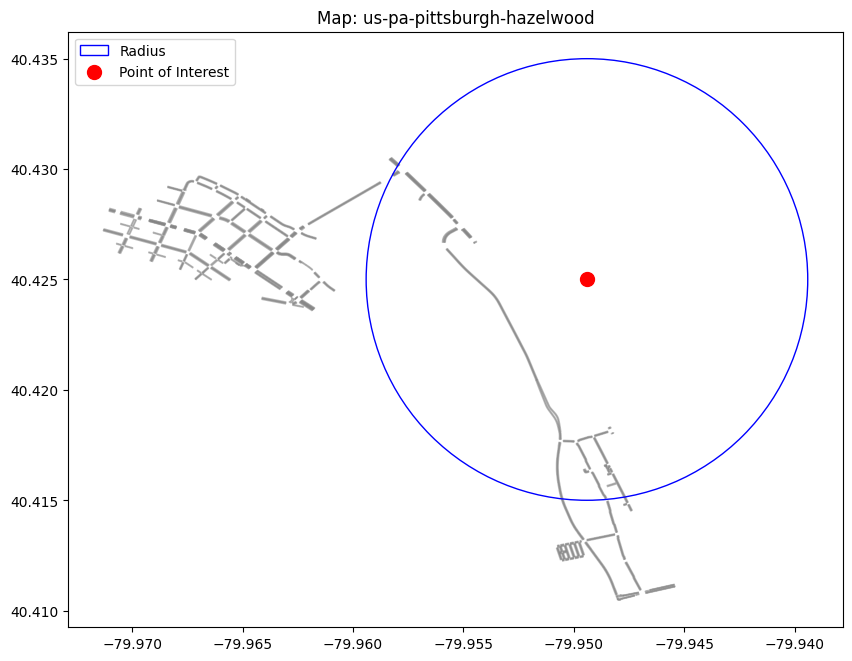

In [16]:
from matplotlib.patches import Circle


radius=0.01
point_2d = Point2D(-79.9494029860944, 40.425)

fig, ax = plt.subplots(figsize=(10, 10))
_plot_map_on_ax(ax, map_api, point_2d, radius=10000)

# Add a circle with the specified radius
circle = Circle((point_2d.x, point_2d.y), radius=radius, color="blue", fill=False, label="Radius")
ax.add_patch(circle)

# Highlight the point of interest
ax.scatter(point_2d.x, point_2d.y, color="red", s=100, label="Point of Interest")

ax.set_aspect("equal", adjustable="box")
ax.legend()

(array('d', [-79.9494029860944, -79.9493745771737, -79.9493712186813, -79.9493456538767, -79.9493049178273, -79.9488270655274, -79.9487885925919, -79.948754562065, -79.9487113952637, -79.94868314825, -79.9482029185058, -79.9481649863422, -79.9481560941786, -79.9482056312263, -79.9482543300837, -79.9483439326286, -79.9484609439969, -79.9485339503735, -79.9486190266907, -79.9486651271582, -79.9487155862153, -79.9487582501024, -79.9488148279488, -79.9488677177578, -79.9489222001284, -79.9489984754473, -79.9490554723889, -79.9491010699421, -79.9491758365184, -79.9492653552443, -79.949330817908, -79.9493926763535, -79.9494029860944]), array('d', [40.4132276919305, 40.4132339127615, 40.4132346481859, 40.413239753694, 40.4132477310496, 40.4133453099868, 40.4133529682362, 40.413359605385, 40.4133687952822, 40.4133738369613, 40.4134717438624, 40.4134801374067, 40.4134495259224, 40.4134397616683, 40.4134297421381, 40.4134111070844, 40.4133872388915, 40.413372305312, 40.4133554571671, 40.41334613

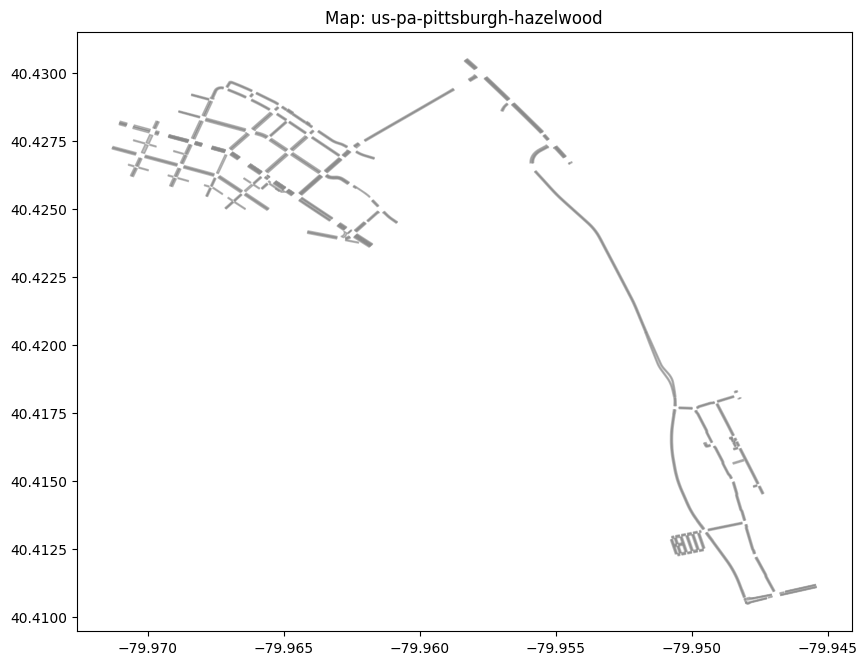

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))

_plot_map_on_ax(ax, map_api, point_2d, radius=20)

ax.set_aspect("equal", adjustable="box")


In [4]:
import ast

def plot_lane(ax, lane, color):
    ax.fill(*lane.shapely_polygon.exterior.xy, color=color, alpha=0.5)


map_objects_dict = map_api.get_proximal_map_objects(point_2d, radius=radius, layers=[MapSurfaceType.LANE_GROUP])
lane = map_objects_dict[MapSurfaceType.LANE_GROUP][3]

fig, ax = plt.subplots(figsize=(10, 10))


plot_lane(ax, lane, color="grey")

for lane_ in lane.successors:
    plot_lane(ax, lane_, color="green")

for lane_ in lane.predecessors:
    plot_lane(ax, lane_, color="red")

# ax.set_aspect("equal", adjustable="box")



lane = map_objects_dict[MapSurfaceType.LANE_GROUP][1]

# fig, ax = plt.subplots(figsize=(10, 10))


plot_lane(ax, lane, color="grey")

for lane_ in lane.successors:
    plot_lane(ax, lane_, color="green")

for lane_ in lane.predecessors:
    plot_lane(ax, lane_, color="red")

ax.set_aspect("equal", adjustable="box")

AssertionError: Object representation for layer(s): [<MapSurfaceType.LANE_GROUP: 1>] is unavailable

In [ ]:
lane._lane_row

AttributeError: 'GPKGLaneGroup' object has no attribute '_lane_row'